In [1]:
import scanpy as sc
import pandas as pd


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

%matplotlib inline

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.5 louvain==0.8.2 pynndescent==0.5.12


In [2]:
adata = sc.read_10x_mtx(
    "./filtered_gene_bc_matrices/hg19/",
    var_names="gene_symbols",
    cache=True
)
adata

... reading from cache file cache/filtered_gene_bc_matrices-hg19-matrix.h5ad


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [3]:
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


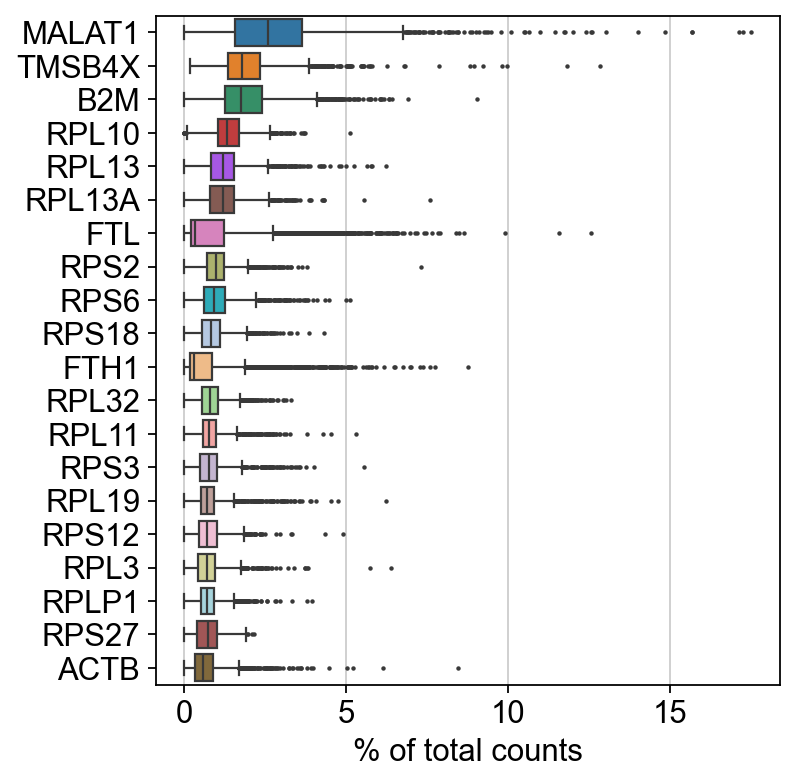

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [7]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

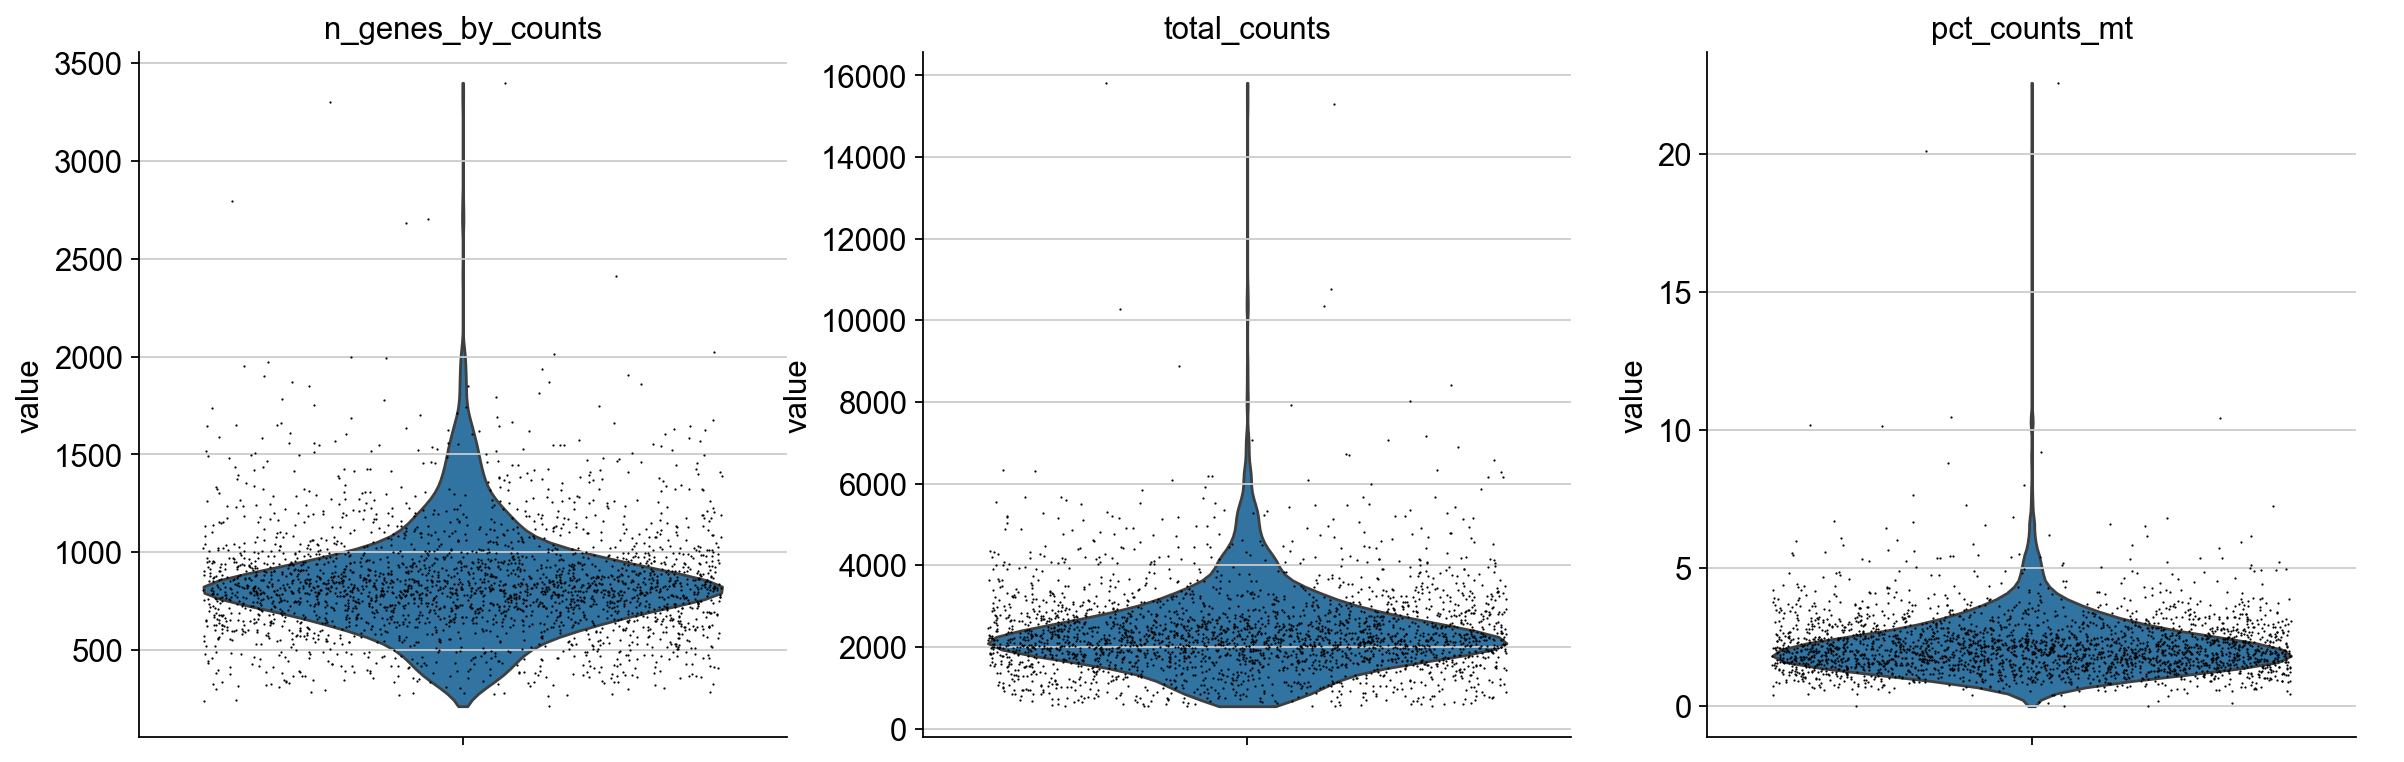

In [8]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

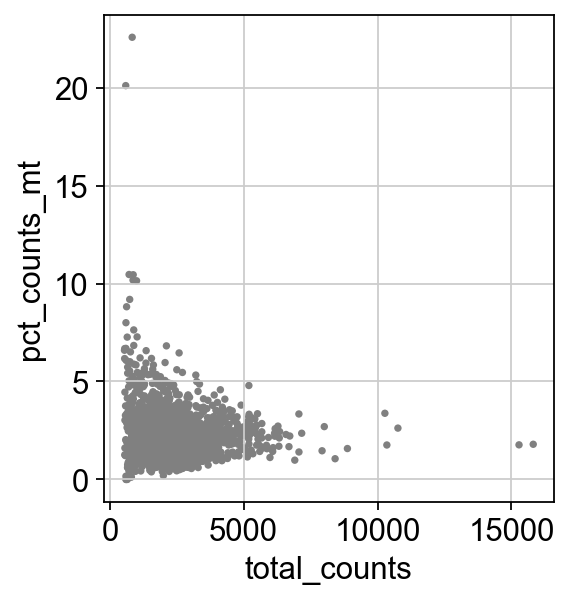

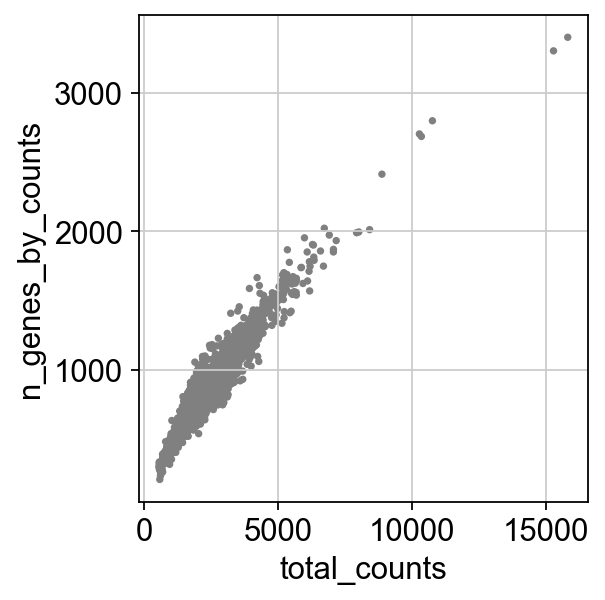

In [9]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [10]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

In [11]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [12]:
matrix_df = pd.DataFrame(adata.X.toarray(), columns=adata.var_names, index=adata.obs_names)
matrix_df

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
small_sample = matrix_df.sample(800, random_state=17)
small_sample = small_sample.astype(int)
small_sample

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
TTATGGCTTATGGC-1,0,0,0,0,0,0,0,0,0,0,...,0,15,4,0,7,0,0,0,0,0
TAGCCCTGCGGAGA-1,0,0,0,0,0,0,0,0,0,0,...,0,8,0,0,39,0,0,0,0,0
TCTAAGCTAATGCC-1,0,0,0,0,0,0,0,0,0,0,...,0,3,3,0,3,0,0,0,0,0
ATAATGACCTACTT-1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,2,0,0,0,0,0
CGACCACTGCCAAT-1,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,24,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGTCGCTTCTCAT-1,0,0,0,0,0,0,0,0,0,0,...,1,5,0,0,1,0,0,0,0,0
GAGTTGTGGTAGCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
CTCATTGATGCTTT-1,0,0,0,0,0,0,0,0,0,0,...,0,7,1,0,5,0,1,0,0,0
CCGACACTGGTTTG-1,0,0,0,0,0,0,0,0,0,0,...,0,7,1,0,7,0,0,0,0,0


In [32]:
#small_sample.to_csv("./processed/preprocessed_pbmc3k_filtered.csv", index=True, index_label="CellID")
small_sample.to_csv("../../data/scRNASeq_counts_pbmc_preped.csv", index=True, index_label="CellID")

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


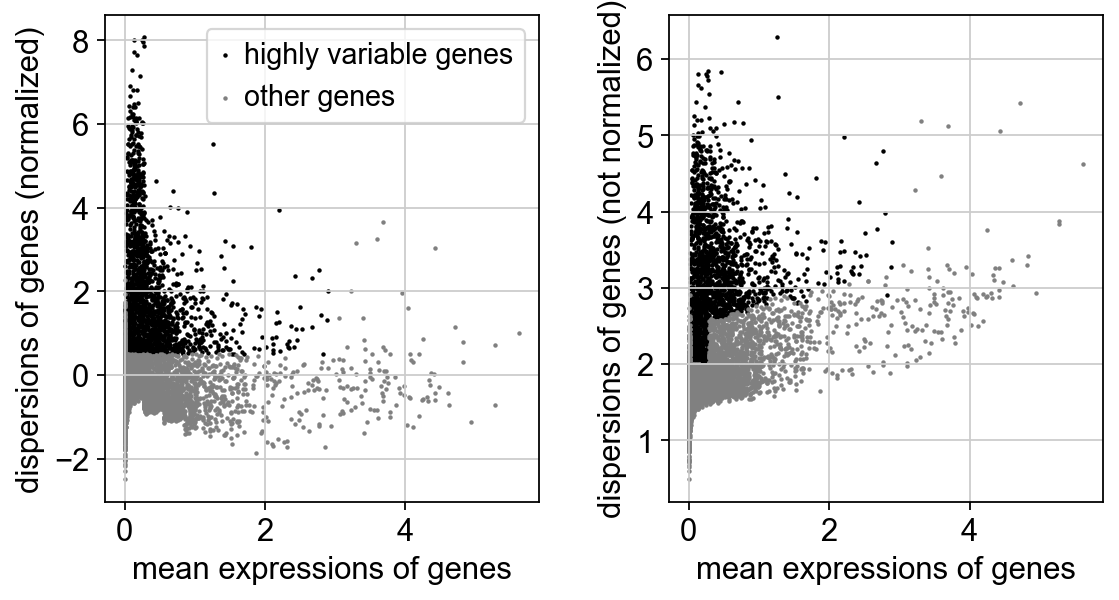

In [15]:
new_adata = adata.copy()
sc.pp.normalize_total(new_adata, target_sum=1e4)
sc.pp.log1p(new_adata)
sc.pp.highly_variable_genes(new_adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(new_adata)
new_adata.raw = new_adata

In [16]:
new_adata = new_adata[:, new_adata.var.highly_variable]
sc.pp.regress_out(new_adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(new_adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/yokoda/.miniforge3_x86-64/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:14)


computing PCA
    with n_comps=50
    finished (0:00:00)


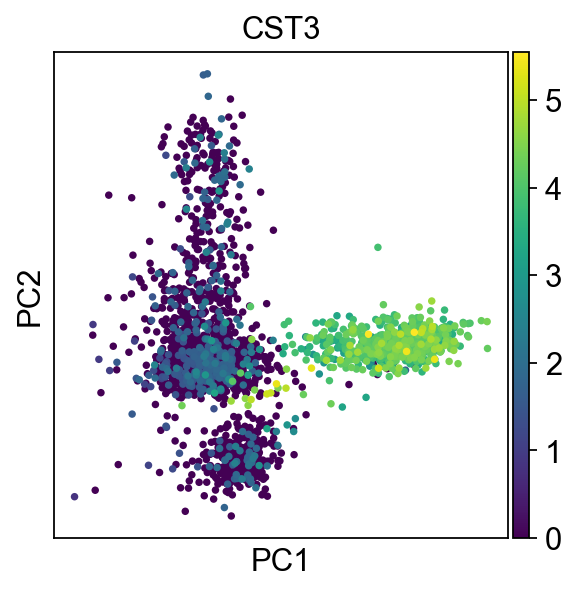

In [17]:
sc.tl.pca(new_adata, svd_solver="arpack")
sc.pl.pca(new_adata, color="CST3")

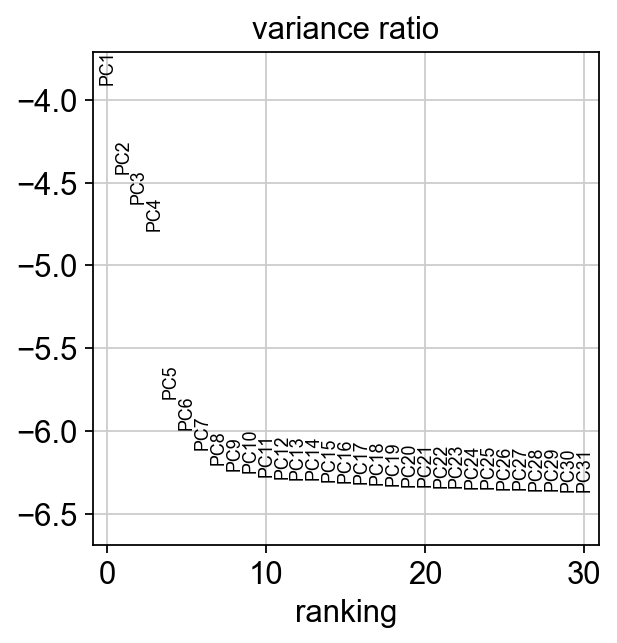

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


In [20]:
sc.pl.pca_variance_ratio(new_adata, log=True)
sc.pp.neighbors(new_adata, n_neighbors=10, n_pcs=40)

sc.tl.leiden(
    new_adata,
    resolution=0.9,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)

sc.tl.paga(new_adata)
sc.pl.paga(new_adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(new_adata, init_pos='paga')
sc.tl.umap(new_adata)

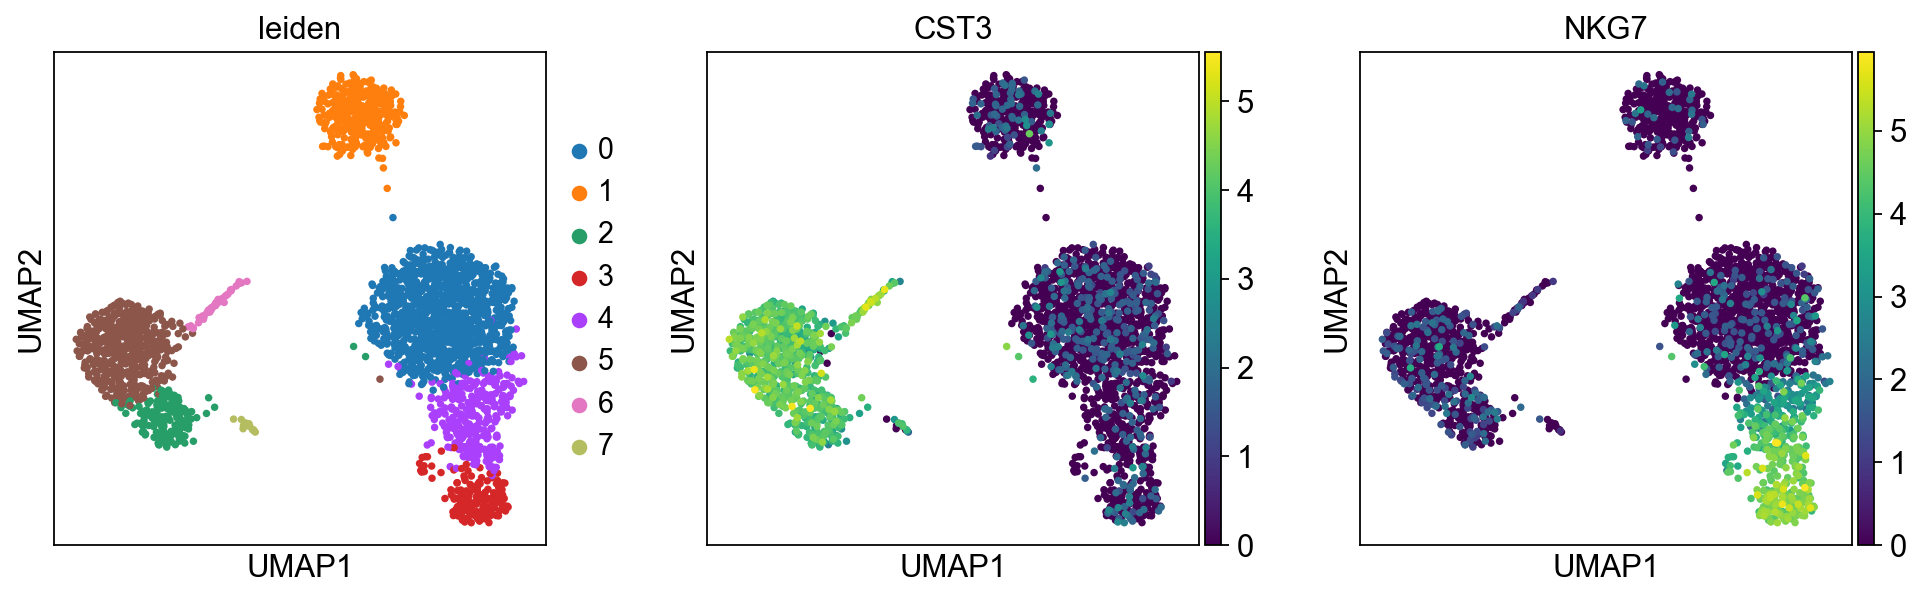

In [21]:
sc.pl.umap(new_adata, color=["leiden", "CST3", "NKG7"])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


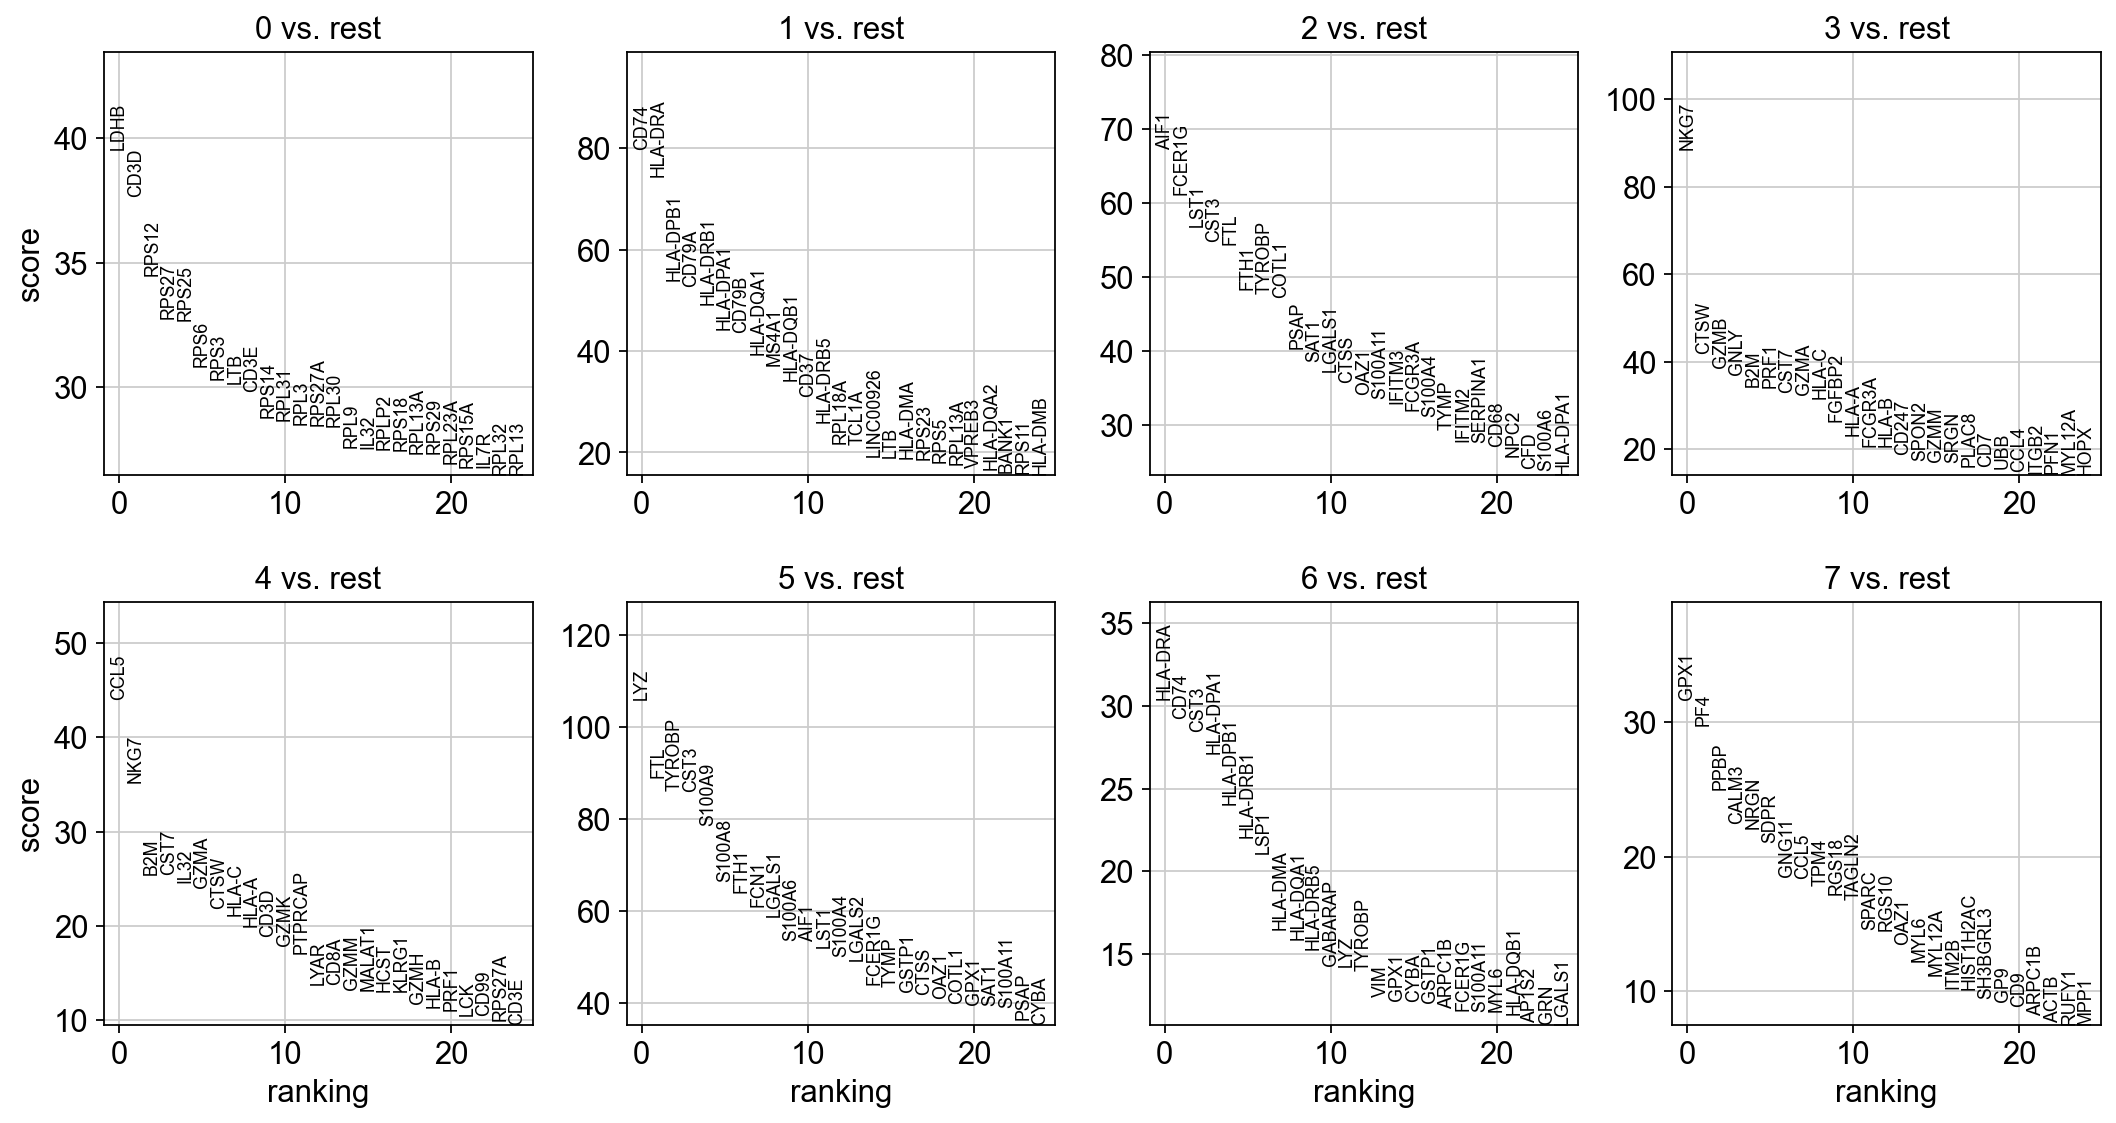

In [22]:
sc.tl.rank_genes_groups(new_adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(new_adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


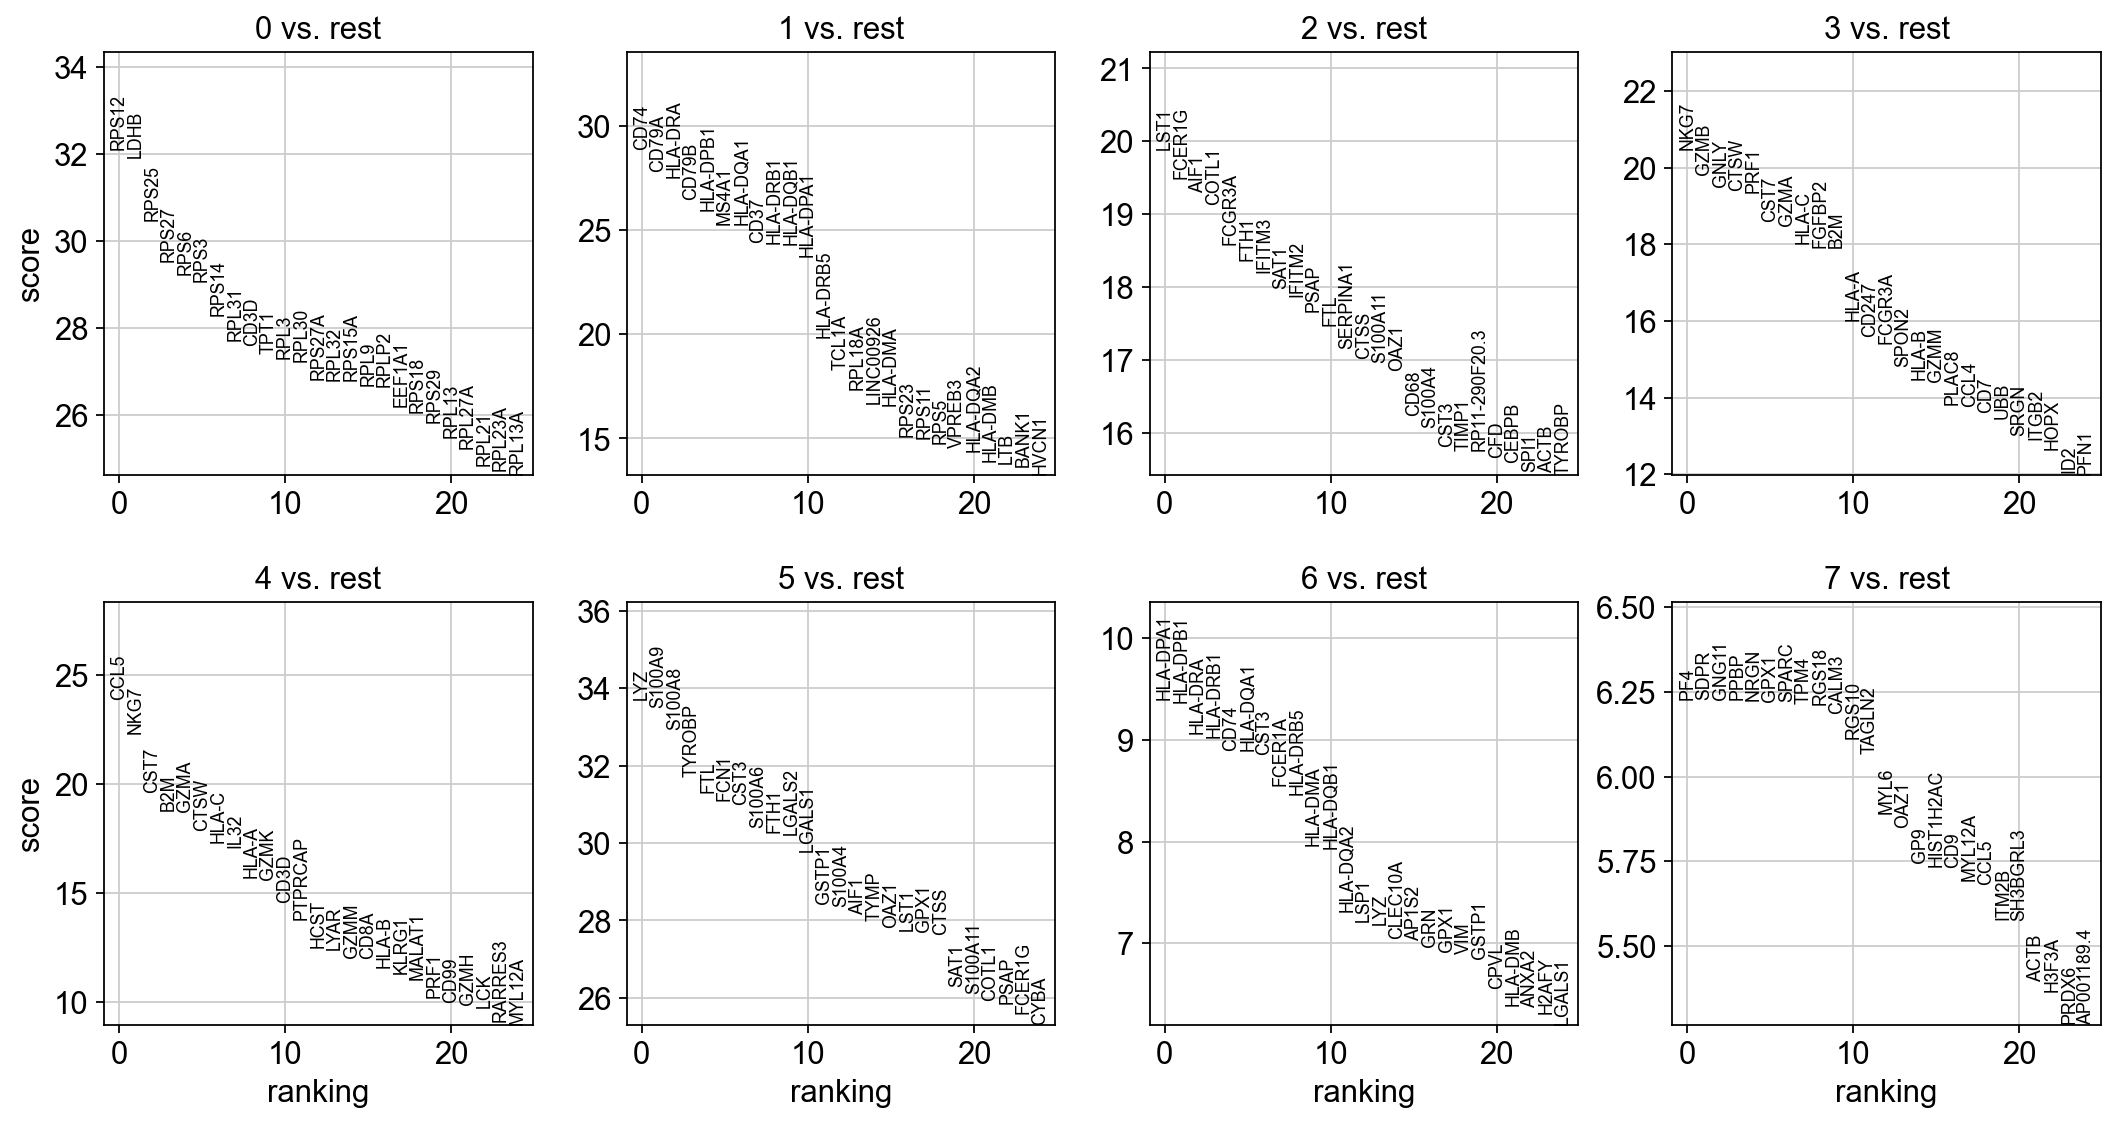

In [23]:
sc.tl.rank_genes_groups(new_adata, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(new_adata, n_genes=25, sharey=False)

In [24]:
new_cluster_names = [
    "CD4 T",
    "B",
    "FCGR3A+ Monocytes",
    "NK",
    "CD8 T",
    "CD14+ Monocytes",
    "Dendritic",
    "Megakaryocytes",
]
new_adata.rename_categories("leiden", new_cluster_names)

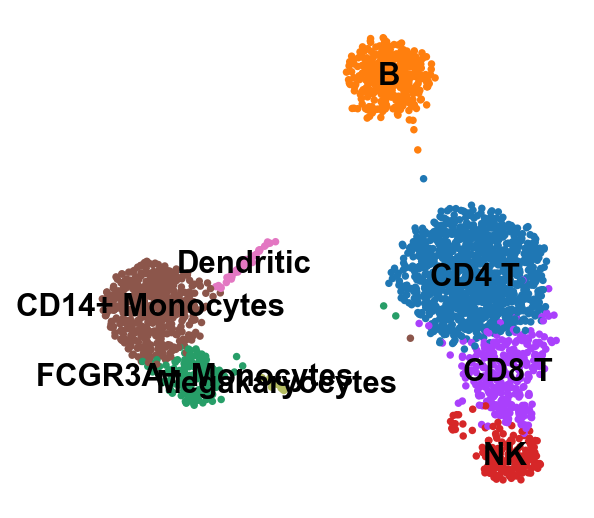

In [25]:
sc.pl.umap(
    new_adata, color="leiden", legend_loc="on data", title="", frameon=False,
)

In [26]:
new_adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD4 T
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,FCGR3A+ Monocytes
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,B
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,B
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795,B


In [33]:
cluster_df = new_adata.obs[["leiden"]].copy()

cluster_df = cluster_df.merge(
    matrix_df, left_index=True, right_index=True,
    how="inner",
)[["leiden"]].rename(columns={"leiden": "cluster"})
cluster_df

,cluster
AAACATACAACCAC-1,CD4 T
AAACATTGAGCTAC-1,B
AAACATTGATCAGC-1,CD4 T
AAACCGTGCTTCCG-1,FCGR3A+ Monocytes
AAACCGTGTATGCG-1,NK
...,...
TTTCGAACTCTCAT-1,CD14+ Monocytes
TTTCTACTGAGGCA-1,B
TTTCTACTTCCTCG-1,B
TTTGCATGAGAGGC-1,B


In [34]:
cluster_df.to_csv("../../data/scRNASeq_cluster_pbmc_preped.csv", index=True, index_label="CellID")